SIMPLE LINEAR REGRESSION


Kelompok 1:
1. Zaki Ahmad Basyary
2. Alih Bangun Wicaksono
3. Leo Fetri Hendli
4. Ahmad Mauluddin

Langkah- langkah:
1. Sample Dataset (harga terhadap ukuran sepatu)

In [2]:
import pandas as pd

sepatu = {'ukuran': [36, 38, 40, 43, 45], 
         'harga': [10, 13, 15, 19, 22]}

sepatu_df = pd.DataFrame(sepatu)
sepatu_df

,ukuran,harga
0,36,10
1,38,13
2,40,15
3,43,19
4,45,22


2. Visualisasi data (data sepatu)

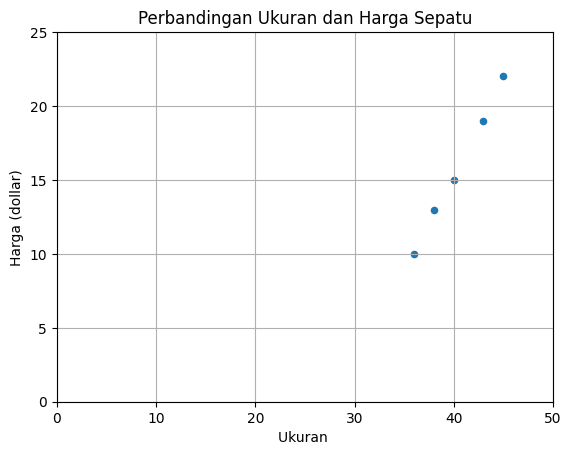

In [11]:

import matplotlib.pyplot as plt

sepatu_df.plot(kind='scatter', x='ukuran', y='harga')

plt.title('Perbandingan Ukuran dan Harga Sepatu')
plt.xlabel('Ukuran ')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 50)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

3. Penyesuaian Dataset


In [12]:
import numpy as np

X = np.array(sepatu_df['ukuran'])
y = np.array(sepatu_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [36 38 40 43 45]
y: [10 13 15 19 22]


In [15]:

X = X.reshape(-1, 1)
X.shape

(5, 1)

In [17]:
X

array([[36],
       [38],
       [40],
       [43],
       [45]], dtype=int64)

4. Training Simple Linear Regression Model

In [ ]:
!pip install scikit-learn

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()


5. Visualisasi Simple Linear Regression Model

In [26]:

X_vis = np.array([0, 50]).reshape(-1, 1)
y_vis = model.predict(X_vis)

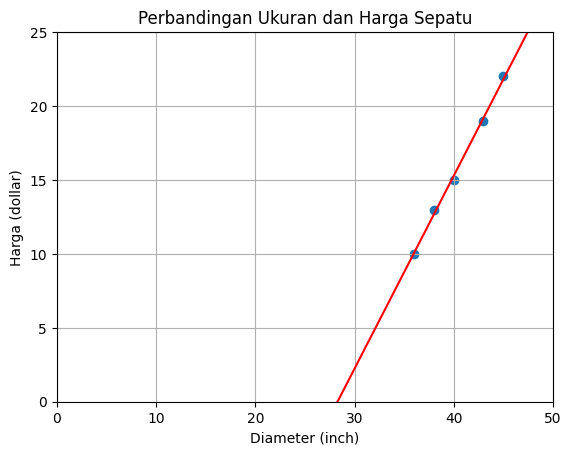

In [27]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Ukuran dan Harga Sepatu')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 50)
plt.ylim(0, 25)
plt.grid(True)
plt.show()


In [28]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: -36.90225563909773
slope: [1.30451128]


Mencari nilai slope


In [29]:

print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[36]
 [38]
 [40]
 [43]
 [45]]

X flatten: [36 38 40 43 45]

y: [10 13 15 19 22]


In [30]:
#Variance
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance: {variance_x}')

variance: 13.3


In [31]:
#Covariance

np.cov(X.flatten(), y)

array([[13.3 , 17.35],
       [17.35, 22.7 ]])

In [32]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')

covariance: 17.35


In [33]:
#SLOPE
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 1.3045112781954888


Mencari Nilai Intercept

In [34]:
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}')

intercept: -36.902255639097746


6. Prediksi Harga Sepatu

In [35]:
ukuran_sepatu = np.array([39,42,50]).reshape(-1, 1)
ukuran_sepatu

array([[39],
       [42],
       [50]])

In [36]:
prediksi_harga = model.predict(ukuran_sepatu)
prediksi_harga

array([13.97368421, 17.88721805, 28.32330827])

In [37]:
for ukr, hrg in zip(ukuran_sepatu, prediksi_harga):
    print(f'Diameter: {ukr} predilsi harga: {hrg}')

Diameter: [39] predilsi harga: 13.973684210526315
Diameter: [42] predilsi harga: 17.887218045112782
Diameter: [50] predilsi harga: 28.32330827067669


7. Evaluasi Simple Linear Regression Model


In [38]:
#Training and Testing Dataset
X_train = np.array([36, 38, 40, 43, 45]).reshape(-1, 1)
y_train = np.array([10, 13, 15, 19, 22])

X_test = np.array([38, 35, 41, 44, 36]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 10])

In [39]:
#Training Simple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared (R^2) => Secara otomatis

In [40]:

from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.8099789254969052


Mencari nilai R-squared (R^2)=> Secara Manual

In [41]:
#SSres
ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
              for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 11.591285544688786


In [42]:
#SStot
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 61.0


In [43]:
# R^2
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

R-squared: 0.8099789254969052


KESIMPULAN

Berdasarkan dataset sepatu yang dimana untuk memprediksi harga sepatu berdasarkan ukuran, menggunkan metode linear regression sudah cukup mencapai keberhasilan yang dimana mendapat nilai nilai R-squared sebesar 0.8 dari evaluasi model regresi linier. Hasil tersebut berarti Model tersebut mendekati 1 atau Model sempurna menjelaskan variasi dalam data. Semakin mendekati 1, semakin baik modelnya.

Dalam konteks nilai R-squared sebesar 0.8:

1. Ini menunjukkan bahwa sekitar 80% dari variasi dalam data target dapat dijelaskan oleh model.
2. Dengan kata lain, model ini berhasil dalam menjelaskan sebagian besar pola dalam data. Namun, masih ada sekitar 20% variasi yang tidak dijelaskan oleh model.